# Exploring Data 

## Exercises

For these exercises, we will be using the **NHANES** data.

1. Using the numerical and graphical summaries, describe the distribution of diastolic blood pressure `dbp` and `age` among study participants, respectively. 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   62.00   70.00   70.36   78.00  130.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   34.00   48.00   49.18   63.00   85.00 

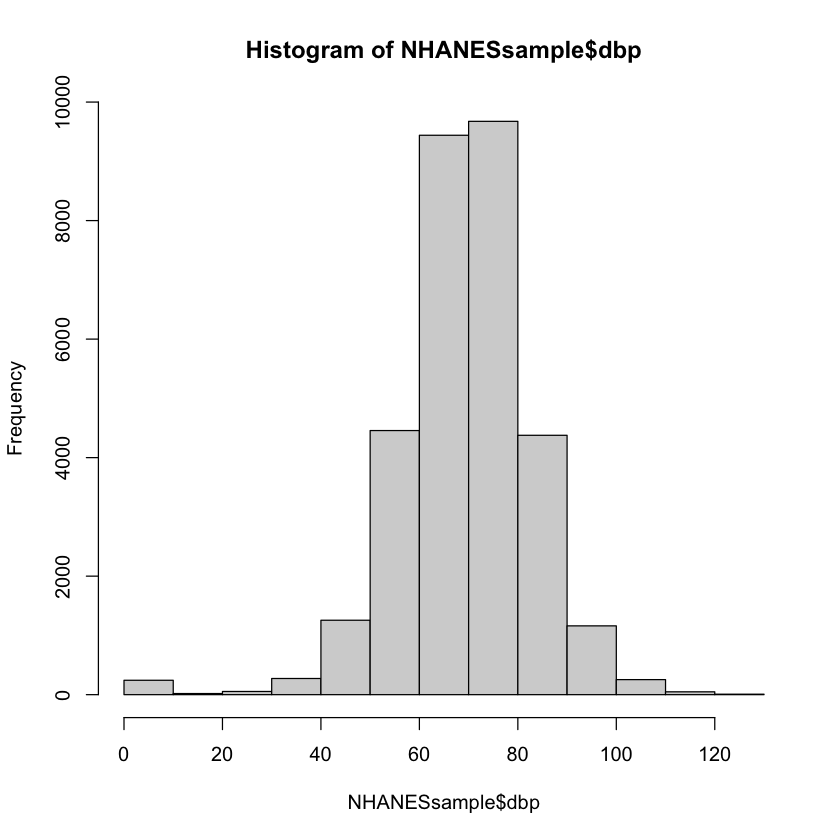

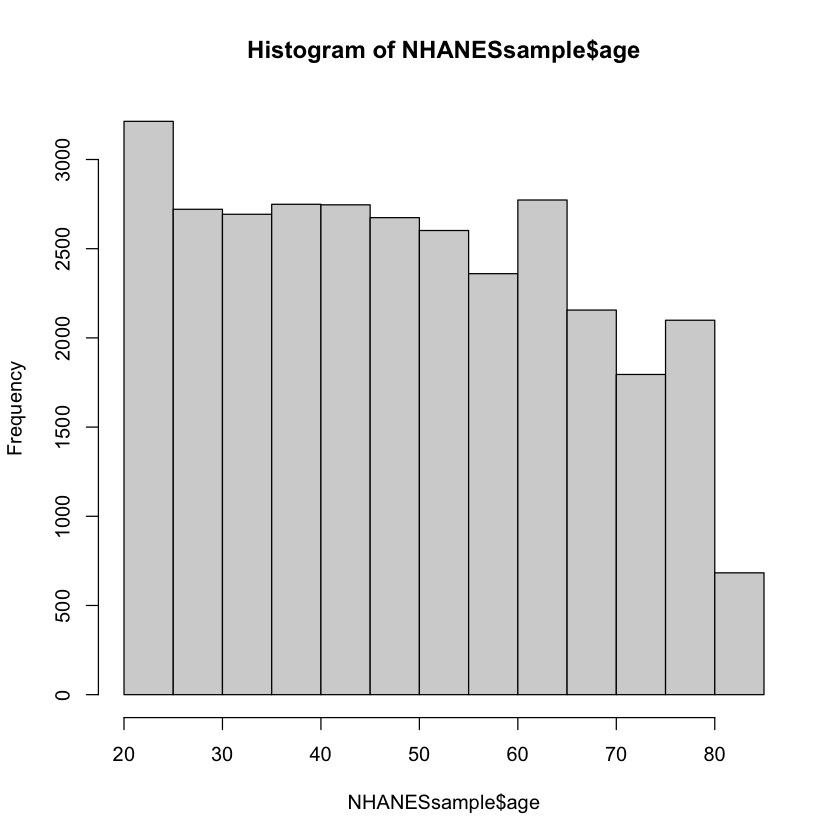

In [1]:
## solutions:
library(RforHDSdata)
data(NHANESsample)

# bbp
summary(NHANESsample$dbp)
hist(NHANESsample$dbp)

# age
summary(NHANESsample$age)
hist(NHANESsample$age)

2. Subset 20-to-55-year-old females and randomly select 1000 participants from the entire dataset. Using the random sample, `nhanes.samp`, explore how does blood pressure vary by age? Is there a remarkable trend in blood pressure between those females? 


In [2]:
NHANESsample.subset <- subset(NHANESsample, 
                              NHANESsample$sex=="Female" & NHANESsample$age>=20 & NHANESsample$age<=55)
nhanes.samp <- sample_n(NHANESsample.subset, size=1000, replace = FALSE)
plot(nhanes.samp$age, nhanes.samp$dbp)

ERROR: Error in sample_n(NHANESsample.subset, size = 1000, replace = FALSE): could not find function "sample_n"


3. Repeat exercise 2 for males.

In [ ]:
subset.males <- subset(NHANESsample, 
                              NHANESsample$sex=="Male" & NHANESsample$age>=20 & NHANESsample$age<=55)
nhanes.samp.males <- sample_n(subset.males, size=1000, replace = FALSE)
plot(nhanes.samp.males$age, nhanes.samp.males$dbp)

4. For males between the ages of 50-59, compare blood pressure across race as reported in the race variable. Order resulting tables from lowest to highest average blood pressure.

In [ ]:
subset.males.1 <- subset(NHANESsample, 
                         NHANESsample$sex=="Male" & NHANESsample$age>=50 & NHANESsample$age<=59)
subset.males.1$race <- as.factor(subset.males.1$race)
boxplot(subset.males.1$dbp ~ subset.males.1$race)

levels(subset.males.1$race)
summary(subset.males.1$dbp[subset.males.1$race=="Non-Hispanic White"])[4]
summary(subset.males.1$dbp[subset.males.1$race=="Mexican American"])[4]
summary(subset.males.1$dbp[subset.males.1$race=="Other Race" ])[4]
summary(subset.males.1$dbp[subset.males.1$race=="Other Hispanic"])[4]
summary(subset.males.1$dbp[subset.males.1$race=="Non-Hispanic Black"])[4]

5. Examine the relationship between BMI levels with blood pressure, age, and income using appropriate correlation matrices and probability.


In [ ]:
library(ggcorrplot)
corr <- round(cor(NHANESsample[,c(2,6,11)]), 1)
ggcorrplot(corr, method = "square")